#### Cleaning and Feature Engineering of January Flights from 2018 and 2019
Gives output - flights_cleanDates

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('df_jan_flights.csv')

In [4]:
df.head()

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,crs_dep_time,dep_delay,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,air_time,flights,distance,first_dep_time
0,0,2019-01-13,DL,DL,1124,DL,N319DN,1124,11697,FLL,...,1755,-1.0,1952,1944.0,-8.0,117.0,88.0,1.0,581.0,NaN
1,1,2019-01-14,AA,AA,2210,AA,N859NN,2210,11278,DCA,...,605,26.0,850,1005.0,75.0,225.0,181.0,1.0,1192.0,NaN
2,2,2019-01-10,AA,AA,3141,OO,N755EV,3141,13930,ORD,...,1450,-2.0,1656,1649.0,-7.0,66.0,32.0,1.0,177.0,NaN
3,3,2019-01-11,UA,UA,2228,UA,N833UA,2228,14122,PIT,...,1709,28.0,2001,1954.0,-7.0,352.0,301.0,1.0,2254.0,NaN
4,4,2019-01-03,DL,DL,3707,OO,N630SK,3707,13487,MSP,...,2226,-4.0,2359,2344.0,-15.0,93.0,50.0,1.0,284.0,NaN


In [5]:
# tail_num dropped for missing values - doesn't seem relevant
# first_dep_time was mostly missing values 
# flights dropped - all 1s 
# mkt_unique_carrier and mkt_carrier are the same  thing 
df = df.drop(['Unnamed: 0', 'first_dep_time', 'tail_num', 'dep_delay', 'mkt_carrier', 'flights'], axis=1)

In [6]:
print(df.loc[df['arr_delay'] > 0,'arr_delay'].count()) # delayed
print(df.loc[df['arr_delay'] < 0,'arr_delay'].count()) # early
print(df.loc[df['arr_delay'] == 0,'arr_delay'].count()) # on time

16611
31630
883


In [7]:
# exploring missing arr_delays
df.loc[df['arr_delay'].isna()][['crs_dep_time','crs_arr_time','arr_time','arr_delay', 'crs_elapsed_time', 'air_time']]

,crs_dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,air_time
51,2030,2140,NaN,NaN,70.0,NaN
55,1135,1239,NaN,NaN,124.0,NaN
57,1945,2235,NaN,NaN,110.0,NaN
75,900,956,NaN,NaN,56.0,NaN
84,1640,1818,NaN,NaN,98.0,NaN
...,...,...,...,...,...,...
48552,1345,2145,344.0,NaN,300.0,NaN
48554,945,1200,1351.0,NaN,135.0,NaN
49617,2129,546,714.0,NaN,317.0,NaN
49718,730,1116,1116.0,NaN,166.0,137.0


In [8]:
# exploring zero delays
df.loc[df['arr_delay']==0][['crs_dep_time','crs_arr_time','arr_time','arr_delay', 'crs_elapsed_time', 'air_time']]

,crs_dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,air_time
48,1125,1306,1306.0,0.0,101.0,75.0
64,740,838,838.0,0.0,118.0,79.0
110,1225,1505,1505.0,0.0,160.0,129.0
207,1955,2107,2107.0,0.0,132.0,96.0
525,2045,2220,2220.0,0.0,95.0,74.0
...,...,...,...,...,...,...
49719,2000,2107,2107.0,0.0,67.0,42.0
49855,1530,1625,1625.0,0.0,55.0,33.0
49869,650,1015,1015.0,0.0,145.0,124.0
49910,1505,1705,1705.0,0.0,120.0,78.0


In [9]:
df.loc[(df['arr_delay'].isna()) & (df['arr_time'].isna())]

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,air_time,distance
51,2019-01-18,AA,5266,OH,5266,11057,CLT,"Charlotte, NC",10990,CHO,"Charlottesville, VA",2030,2140,NaN,NaN,70.0,NaN,245.0
55,2019-01-20,AA,3352,MQ,3352,10792,BUF,"Buffalo, NY",13930,ORD,"Chicago, IL",1135,1239,NaN,NaN,124.0,NaN,473.0
57,2019-01-29,WN,650,WN,650,13232,MDW,"Chicago, IL",10397,ATL,"Atlanta, GA",1945,2235,NaN,NaN,110.0,NaN,591.0
75,2019-01-16,AA,3739,MQ,3739,11298,DFW,"Dallas/Fort Worth, TX",12891,LAW,"Lawton/Fort Sill, OK",900,956,NaN,NaN,56.0,NaN,140.0
84,2019-01-30,DL,5417,9E,5417,12953,LGA,"New York, NY",10581,BGR,"Bangor, ME",1640,1818,NaN,NaN,98.0,NaN,378.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24930,2019-01-30,UA,1472,UA,1472,13930,ORD,"Chicago, IL",12451,JAX,"Jacksonville, FL",900,1223,NaN,NaN,143.0,NaN,864.0
24939,2019-01-22,UA,5716,OO,5716,11278,DCA,"Washington, DC",13930,ORD,"Chicago, IL",2045,2206,NaN,NaN,141.0,NaN,612.0
24943,2019-01-31,UA,5275,OO,5275,10397,ATL,"Atlanta, GA",13930,ORD,"Chicago, IL",1330,1438,NaN,NaN,128.0,NaN,606.0
24983,2019-01-19,AS,426,AS,426,14747,SEA,"Seattle, WA",12478,JFK,"New York, NY",1435,2250,NaN,NaN,315.0,NaN,2422.0


In [10]:
# impute missing arr_delays from crs_arr_time and arr_time
df['crsVSarr_time'] = df['crs_arr_time'] - df['arr_time']
df.loc[df['crsVSarr_time']==0, 'arr_delay']=0
# drop the created column
df.drop('crsVSarr_time', axis=1, inplace=True)

In [11]:
# simplify arr_delays for early and on time to be the same
df.loc[(df['arr_delay']<0), 'arr_delay']=0

In [12]:
# drop remaining missing arr_delay and arr_time
df.dropna(subset=['arr_delay','arr_time'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
# Create binary target for delays
df.loc[df['arr_delay'] <= 0, 'delay_binary']=0
df.loc[df['arr_delay'] > 0, 'delay_binary']=1

In [14]:
#mk_carrier_fl_num 24 cases not equal to op_carrier_fl_num
# all united airlines except 2 DL
# df.loc[df['mkt_carrier_fl_num']!=df['op_carrier_fl_num']]

Converting to dates ang etting date

In [15]:
df['fl_date'] = pd.to_datetime(df['fl_date'])
df['fl_day'] = df['fl_date'].dt.strftime("%A")

Split origin/destination city and state

In [16]:
df[['origin_city','origin_state']]=df['origin_city_name'].str.split(',', expand=True)
df[['dest_city','dest_state']]=df['dest_city_name'].str.split(',', expand=True)

In [17]:
df.head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,...,arr_delay,crs_elapsed_time,air_time,distance,delay_binary,fl_day,origin_city,origin_state,dest_city,dest_state
0,2019-01-13,DL,1124,DL,1124,11697,FLL,"Fort Lauderdale, FL",10397,ATL,...,0.0,117.0,88.0,581.0,0.0,Sunday,Fort Lauderdale,FL,Atlanta,GA
1,2019-01-14,AA,2210,AA,2210,11278,DCA,"Washington, DC",11298,DFW,...,75.0,225.0,181.0,1192.0,1.0,Monday,Washington,DC,Dallas/Fort Worth,TX
2,2019-01-10,AA,3141,OO,3141,13930,ORD,"Chicago, IL",12339,IND,...,0.0,66.0,32.0,177.0,0.0,Thursday,Chicago,IL,Indianapolis,IN
3,2019-01-11,UA,2228,UA,2228,14122,PIT,"Pittsburgh, PA",14771,SFO,...,0.0,352.0,301.0,2254.0,0.0,Friday,Pittsburgh,PA,San Francisco,CA
4,2019-01-03,DL,3707,OO,3707,13487,MSP,"Minneapolis, MN",11898,GFK,...,0.0,93.0,50.0,284.0,0.0,Thursday,Minneapolis,MN,Grand Forks,ND


Convert crs_times to datetime

In [18]:
# pad front with 0
df['crs_dep_hour'] = df['crs_dep_time'].astype(str).str.zfill(4)
df['crs_arr_hour'] = df['crs_arr_time'].astype(str).str.zfill(4)
# replace 2400 (not recognized by dataframe) to 0000 (midnight)
df['crs_dep_hour'].replace('2400', '0000', inplace=True)
df['crs_arr_hour'].replace('2400', '0000', inplace=True)
# convert to datetimes and extract hour oly
df['crs_dep_hour'] = pd.to_datetime(df['crs_dep_hour'], format="%H%M").dt.round('H').dt.hour
df['crs_arr_hour'] = pd.to_datetime(df['crs_arr_hour'], format="%H%M").dt.round('H').dt.hour

In [19]:
# convert hour to time of day categorical variables 
df['dep_time_of_day'] = pd.cut(df['crs_dep_hour'],
    bins=[0,6,12,18,24],
    labels=['overnight','morning','afternoon','evening'],
    right=False,
    include_lowest=True)

df['arr_time_of_day'] = pd.cut(df['crs_arr_hour'],
    bins=[0,6,12,18,24],
    labels=['overnight','morning','afternoon','evening'],
    right=False,
    include_lowest=True)

In [20]:
# remove errors/outlier on crs_elapsed_time greater than 1500 
df = df[df['crs_elapsed_time'] < 1500]

In [21]:
df['week_num'] = df['fl_date'].dt.isocalendar().week

In [22]:
df.head(10)

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,...,fl_day,origin_city,origin_state,dest_city,dest_state,crs_dep_hour,crs_arr_hour,dep_time_of_day,arr_time_of_day,week_num
0,2019-01-13,DL,1124,DL,1124,11697,FLL,"Fort Lauderdale, FL",10397,ATL,...,Sunday,Fort Lauderdale,FL,Atlanta,GA,18,20,evening,evening,2
1,2019-01-14,AA,2210,AA,2210,11278,DCA,"Washington, DC",11298,DFW,...,Monday,Washington,DC,Dallas/Fort Worth,TX,6,9,morning,morning,3
2,2019-01-10,AA,3141,OO,3141,13930,ORD,"Chicago, IL",12339,IND,...,Thursday,Chicago,IL,Indianapolis,IN,15,17,afternoon,afternoon,2
3,2019-01-11,UA,2228,UA,2228,14122,PIT,"Pittsburgh, PA",14771,SFO,...,Friday,Pittsburgh,PA,San Francisco,CA,17,20,afternoon,evening,2
4,2019-01-03,DL,3707,OO,3707,13487,MSP,"Minneapolis, MN",11898,GFK,...,Thursday,Minneapolis,MN,Grand Forks,ND,22,0,evening,overnight,1
5,2019-01-14,UA,3547,YX,3547,12953,LGA,"New York, NY",13930,ORD,...,Monday,New York,NY,Chicago,IL,14,16,afternoon,afternoon,3
6,2019-01-12,AA,2991,OO,2991,13930,ORD,"Chicago, IL",14730,SDF,...,Saturday,Chicago,IL,Louisville,KY,19,21,evening,evening,2
7,2019-01-21,UA,4888,C5,4888,11618,EWR,"Newark, NJ",11996,GSP,...,Monday,Newark,NJ,Greer,SC,22,0,evening,overnight,4
8,2019-01-03,UA,1246,UA,1246,14893,SMF,"Sacramento, CA",12266,IAH,...,Thursday,Sacramento,CA,Houston,TX,6,11,morning,morning,1
9,2019-01-10,DL,1842,DL,1842,14908,SNA,"Santa Ana, CA",13487,MSP,...,Thursday,Santa Ana,CA,Minneapolis,MN,14,20,afternoon,evening,2


In [23]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin_airport_id', 'origin',
       'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name',
       'crs_dep_time', 'crs_arr_time', 'arr_time', 'arr_delay',
       'crs_elapsed_time', 'air_time', 'distance', 'delay_binary', 'fl_day',
       'origin_city', 'origin_state', 'dest_city', 'dest_state',
       'crs_dep_hour', 'crs_arr_hour', 'dep_time_of_day', 'arr_time_of_day',
       'week_num'],
      dtype='object')

In [24]:
df.week_num.value_counts()

2    11148
4    10956
3    10922
1    10400
5     5707
Name: week_num, dtype: Int64

In [25]:
df2 = df[['mkt_unique_carrier','origin','origin_city','dest','dest_city','distance','fl_date','fl_day','week_num','dep_time_of_day','arr_time_of_day','arr_delay','delay_binary']].copy()

In [26]:
df2.head()

,mkt_unique_carrier,origin,origin_city,dest,dest_city,distance,fl_date,fl_day,week_num,dep_time_of_day,arr_time_of_day,arr_delay,delay_binary
0,DL,FLL,Fort Lauderdale,ATL,Atlanta,581.0,2019-01-13,Sunday,2,evening,evening,0.0,0.0
1,AA,DCA,Washington,DFW,Dallas/Fort Worth,1192.0,2019-01-14,Monday,3,morning,morning,75.0,1.0
2,AA,ORD,Chicago,IND,Indianapolis,177.0,2019-01-10,Thursday,2,afternoon,afternoon,0.0,0.0
3,UA,PIT,Pittsburgh,SFO,San Francisco,2254.0,2019-01-11,Friday,2,afternoon,evening,0.0,0.0
4,DL,MSP,Minneapolis,GFK,Grand Forks,284.0,2019-01-03,Thursday,1,evening,overnight,0.0,0.0


In [34]:
df2.to_csv('flights_cleanDates.csv')

Example code for seeing low observations

In [27]:
carrier_prop = df2.mkt_unique_carrier.value_counts(normalize=True)
carrier_prop

AA    0.263204
DL    0.217674
UA    0.189811
WN    0.174852
AS    0.050211
B6    0.038141
NK    0.022755
F9    0.015896
HA    0.011622
G4    0.011316
VX    0.004518
Name: mkt_unique_carrier, dtype: float64

In [28]:
bottom_quantile = carrier_prop.quantile(q=0.6)

In [29]:
bottom_quantile

0.050210652718132416

In [30]:
small_market = carrier_prop[carrier_prop<=bottom_quantile]

In [31]:
df2.loc[df2['mkt_unique_carrier'].isin(small_market.index.tolist()), 'mkt_unique_carrier']='small_market'

In [32]:
df2.mkt_unique_carrier.value_counts()

AA              12932
DL              10695
UA               9326
WN               8591
small_market     7589
Name: mkt_unique_carrier, dtype: int64

Sample EDA

<AxesSubplot:xlabel='fl_day', ylabel='arr_delay'>

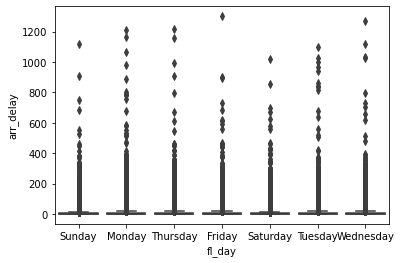

In [33]:
sns.boxplot(x='fl_day', y='arr_delay', data=df)

<AxesSubplot:xlabel='crs_dep_hour', ylabel='arr_delay'>

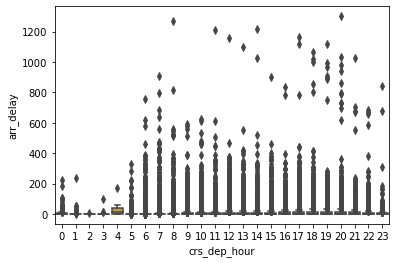

In [34]:
sns.boxplot(x='crs_dep_hour', y='arr_delay', data=df)

<AxesSubplot:xlabel='distance', ylabel='arr_delay'>

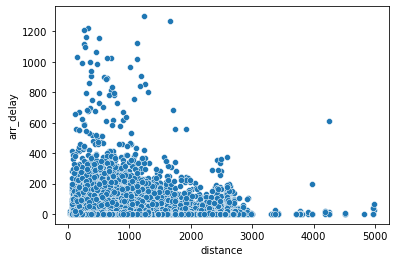

In [35]:
sns.scatterplot(data=df, x='distance', y='arr_delay')

<AxesSubplot:xlabel='mkt_unique_carrier', ylabel='arr_delay'>

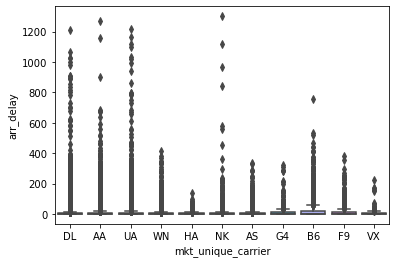

In [36]:
sns.boxplot(y='arr_delay',x='mkt_unique_carrier', data=df)